## Imports
Import pandas, numpy, matplotlib, sklearn and seaborn.

In [1032]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

%matplotlib inline

In [1033]:
car_prices = pd.read_csv('car data.csv')
car_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
Car_Name         301 non-null object
Year             301 non-null int64
Selling_Price    301 non-null float64
Present_Price    301 non-null float64
Kms_Driven       301 non-null int64
Fuel_Type        301 non-null object
Seller_Type      301 non-null object
Transmission     301 non-null object
Owner            301 non-null int64
dtypes: float64(2), int64(3), object(4)
memory usage: 21.2+ KB


In [1034]:
#Checking the number of categories and count for categorical columns
print(car_prices['Seller_Type'].value_counts())
print(car_prices['Fuel_Type'].value_counts())
print(car_prices['Transmission'].value_counts())

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [1035]:
#function to encode categorical values into numerical ones

def encode_values(data_frame,column):
    
    label_encoder = LabelEncoder()

    label_encoder.fit(data_frame[column])

    data_frame['encoded_'+column] = label_encoder.transform(data_frame[column])
    
    

In [1036]:
encode_values(car_prices,'Seller_Type')
encode_values(car_prices,'Transmission')
encode_values(car_prices,'Fuel_Type')

car_prices.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,encoded_Seller_Type,encoded_Transmission,encoded_Fuel_Type
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,0,1,2
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,0,1,1
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,0,1,2
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,0,1,2
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,0,1,1


# Exploratory data analysis (EDA)

(0, 100000)

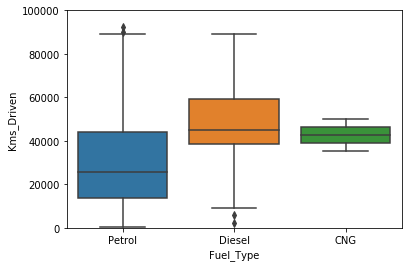

In [1037]:
ax=sns.boxplot(x = 'Fuel_Type', y = 'Kms_Driven' , data=car_prices)
ax.set_ylim([0,100000]) #y-limit set to 100000 for better visualization

Diesel and CNG cars have run more (Racked up more Kms) than petrol cars

(0, 30)

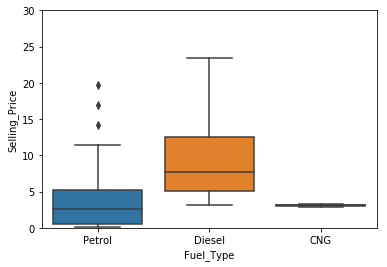

In [1038]:
bxPlt = sns.boxplot(x = 'Fuel_Type', y = 'Selling_Price' , data=car_prices)#, hue='Seller_Type')
bxPlt.set_ylim([0,30])

The cost of cars sold by dealers is more than those sold by individuals. This is probably because the dealers refurbish and service the cars and sell it with some kind of warranty. Cost of diesel cars is more than that of petrol cars.

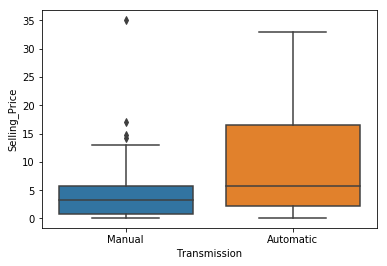

In [1039]:
bxPlt = sns.boxplot(x = 'Transmission', y = 'Selling_Price' , data=car_prices)

Generally, the cost of automatics is more than that of manuals. 

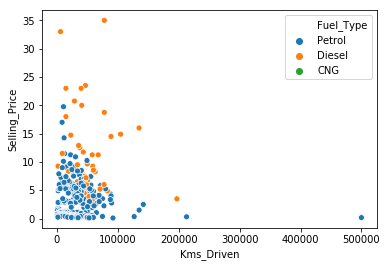

In [1040]:
plts = sns.scatterplot(x=car_prices['Kms_Driven'],y = car_prices['Selling_Price'], hue = car_prices['Fuel_Type'])
#plts.set_xlim([0,150000])

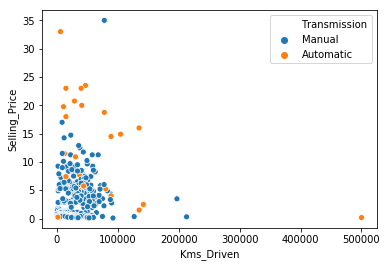

In [1041]:
plts = sns.scatterplot(x=car_prices['Kms_Driven'],y = car_prices['Selling_Price'], hue = car_prices['Transmission'])
#plts.set_xlim([0,150000])

As can be seen from the 2 graphs above, the most expensive cars are diesel automatics

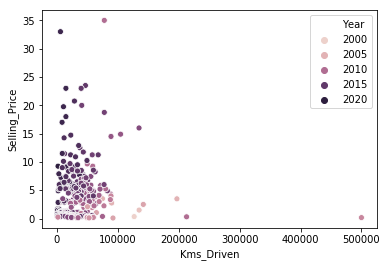

In [1042]:
plts = sns.scatterplot(x=car_prices['Kms_Driven'],y = car_prices['Selling_Price'], hue = car_prices['Year'])
#plts.set_xlim([0,150000])

Cars which are older have covered more Kilometers

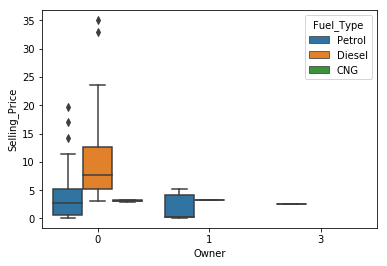

In [1043]:
sns.boxplot(data = car_prices, x = 'Owner' , y = 'Selling_Price', hue  = 'Fuel_Type')

People hold on to diesel cars for longer which might be the reason why they have mostly 0 number of owners

# Applying models

In [1060]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
cross_validation_folds = 5

cv_means_and_errors = []

In [1061]:
#Selecting features and test/train split for the model
def initialize_data():
    
    car_prices = pd.read_csv('car data.csv')
    
    y=car_prices['Selling_Price']

    X=car_prices.drop(["Selling_Price","Car_Name",'Fuel_Type','Seller_Type','Transmission'],axis=1)

    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)
    
    #X_test,X_train = normalize_Data(X_test,X_train)
    
    return X_train,X_test,y_train,y_test
    
  
#Normalize data with 0 mean and normal Standard Deviation
def normalize_Data(X_test, X_train):
    
    X_test = (X_test-X_test.mean())/(X_test.max()-X_test.min())
    
    X_train = (X_train - X_train.mean())/(X_train.max()-X_train.min())
    
    return X_test,X_train

In [1062]:
#The cross validation score can be used to further choose the best model
def calculate_cross_validation_score(algorithm,X_train,y_train):
     
    cross_validation_score = cross_val_score(algorithm,X_train,y_train,cv=cross_validation_folds)
    
    print(algorithm,'\n')
    
    print("CV scores:",cross_validation_score,"\n")
    
    print("CV scores mean:",cross_validation_score.mean())
    
    return cross_validation_score.mean()
            
    
    
#Calculating the training and testing errors using the coefficient of determination
def calculate_training_testing_error(algorithm,X_train,y_train,X_test,y_test):
    
    
    algorithm.fit(X_train,y_train)
    
    y_test_predicted = algorithm.predict(X_test);
    
    y_train_predicted = algorithm.predict(X_train);
    
    y_test_predicted_data_frame = pd.DataFrame(y_test_predicted)
    
    y_train_predicted_data_frame = pd.DataFrame(y_train_predicted)
    
    r2_train = r2_score(y_train,y_train_predicted_data_frame);
    
    r2_test = r2_score(y_test,y_test_predicted_data_frame);
    
    print(algorithm,'\n')
    
    print("R2 Training:",r2_train,"\n")
    
    print("R2 Test:",r2_test)
    
    cross_validation_mean = calculate_cross_validation_score(algorithm, X_train, y_train);
    
    new_row = {'Algorithm':algorithm, 'CV Mean':cross_validation_mean ,'R2 Test':r2_test, 'R2 Train':r2_train}
    
    cv_means_and_errors.append(new_row)
    

    
    
    

# Linear Regression

In [1063]:
from sklearn.linear_model import LinearRegression

In [1064]:
linear_regression = LinearRegression()

X_train,X_test,y_train,y_test = initialize_data()

calculate_training_testing_error(linear_regression,X_train,y_train,X_test,y_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False) 

R2 Training: 0.8532890291293729 

R2 Test: 0.8200284800922883
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False) 

CV scores: [0.913896   0.89708885 0.7997684  0.79026171 0.67360608] 

CV scores mean: 0.8149242079275563


# Polynomial Regression

In [1065]:
from sklearn.preprocessing import PolynomialFeatures

In [1066]:
polynomial_features_train = PolynomialFeatures(degree = 3,include_bias=False)

polynomial_features_test = PolynomialFeatures(degree = 3,include_bias=False)


X_train,X_test,y_train,y_test = initialize_data()

X_train_polynomial = polynomial_features_train.fit_transform(X_train)

X_test_polynomial = polynomial_features_test.fit_transform(X_test)


In [1067]:

calculate_training_testing_error(linear_regression,X_train_polynomial,y_train,X_test_polynomial,y_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False) 

R2 Training: 0.9762991138832335 

R2 Test: 0.6816921384565515
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False) 

CV scores: [ 0.95735542  0.94913444  0.95555801  0.93157159 -2.13524891] 

CV scores mean: 0.3316741100323807


# Ridge Regression


In [1068]:
from sklearn.linear_model import Ridge

In [1069]:
ridge_regression = Ridge(alpha=0.04)

In [1070]:
#Ridge regression with Linear X 

X_train,X_test,y_train,y_test = initialize_data()

calculate_training_testing_error(ridge_regression,X_train,y_train,X_test,y_test)

Ridge(alpha=0.04, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001) 

R2 Training: 0.8532890042084806 

R2 Test: 0.8202137312412003
Ridge(alpha=0.04, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001) 

CV scores: [0.91388674 0.89708834 0.7997718  0.79027083 0.67361167] 

CV scores mean: 0.8149258772039879


# Lasso Regression

In [1071]:
from sklearn.linear_model import Lasso

In [1072]:
lasso_regression = Lasso(alpha = 0.04)

In [1073]:
X_train,X_test,y_train,y_test = initialize_data()

#calculate_cross_validation_score(lasso_regression,X_train,y_train)

print('-------------------ERRORS-----------------')

calculate_training_testing_error(lasso_regression,X_train,y_train,X_test,y_test)

-------------------ERRORS-----------------
Lasso(alpha=0.04, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False) 

R2 Training: 0.852920125804288 

R2 Test: 0.8389810792097961
Lasso(alpha=0.04, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False) 

CV scores: [0.91280996 0.89699383 0.79873318 0.79052901 0.67296241] 

CV scores mean: 0.8144056761742228


# Comparing performance of models

In [1074]:
cv_means_and_errors_data_frame = pd.DataFrame(data = cv_means_and_errors ,columns=['Algorithm','CV Mean', 'R2 Test', 'R2 Train'])


In [1078]:
(cv_means_and_errors_data_frame)

,Algorithm,CV Mean,R2 Test,R2 Train
0,"LinearRegression(copy_X=True, fit_intercept=Tr...",0.814924,0.820028,0.853289
1,"LinearRegression(copy_X=True, fit_intercept=Tr...",0.331674,0.681692,0.976299
2,"Ridge(alpha=0.04, copy_X=True, fit_intercept=T...",0.814926,0.820214,0.853289
3,"Lasso(alpha=0.04, copy_X=True, fit_intercept=T...",0.814406,0.838981,0.852920
